In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### Visualisation of Bitcoin dataset

In [9]:
df = pd.read_csv('BTC-USD.csv')
df.columns = ['Date','Open','High','Low','Close','Adj CLose','Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Checking for any null value in df
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj CLose    0
Volume       0
dtype: int64

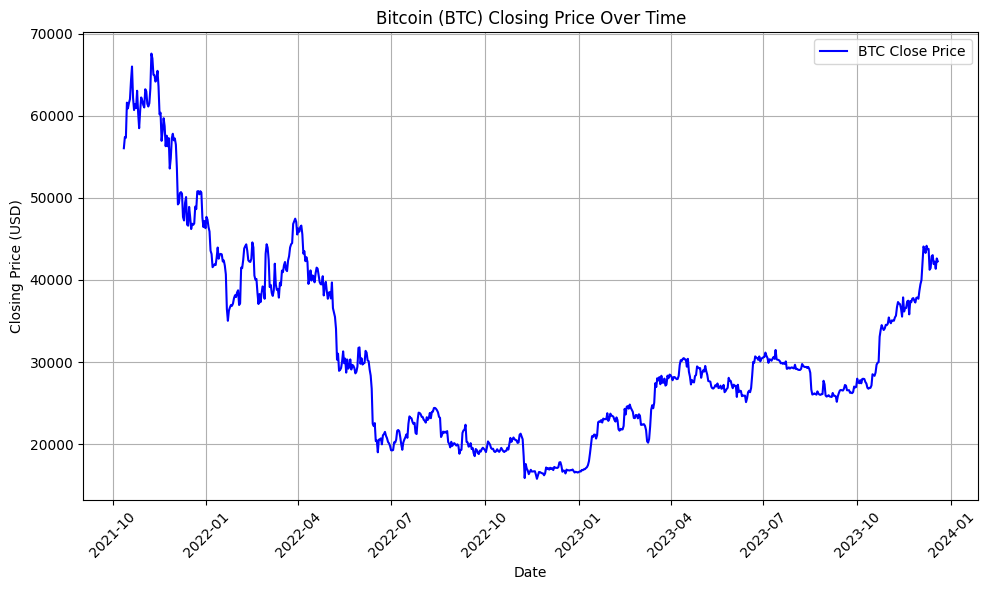

In [10]:
#visualize BTC Closing Price Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue', linewidth=1.5, label='BTC Close Price')
plt.title('Bitcoin (BTC) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

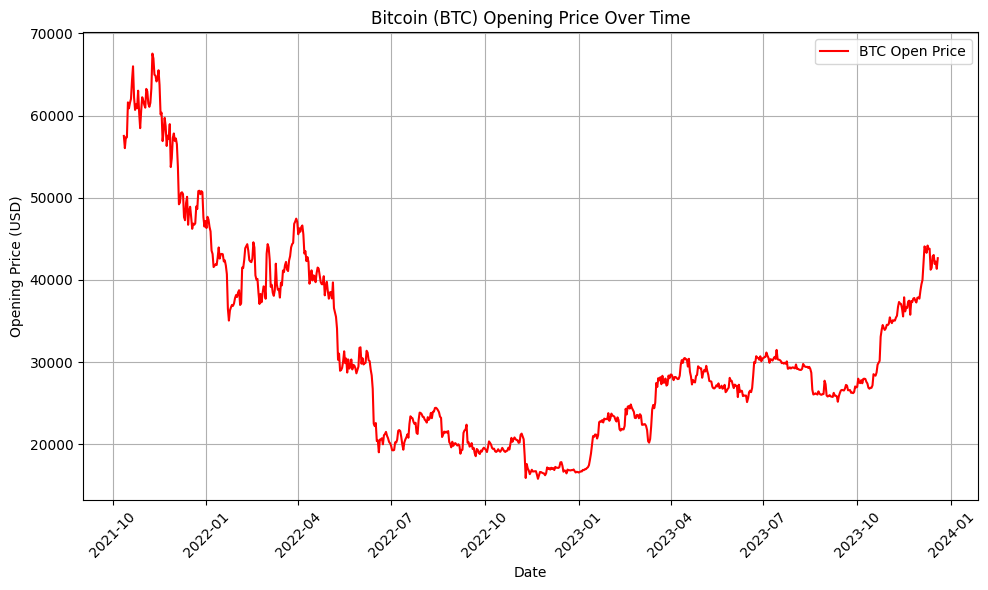

In [11]:
#visualize BTC Opening Price Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], color='red', linewidth=1.5, label='BTC Open Price')
plt.title('Bitcoin (BTC) Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

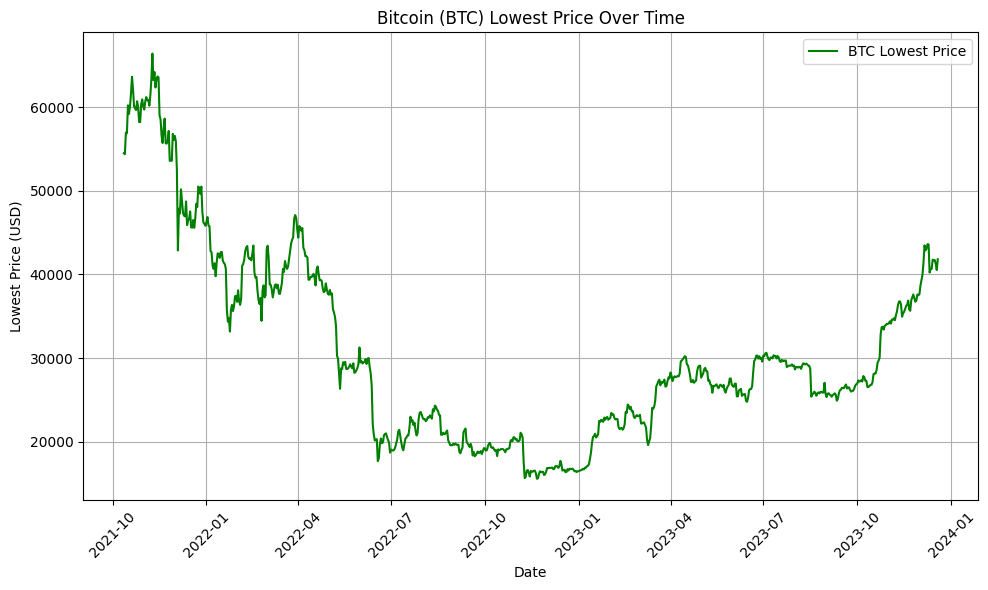

In [12]:
#visualize BTC Lowest Price Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Low'], color='green', linewidth=1.5, label='BTC Lowest Price')
plt.title('Bitcoin (BTC) Lowest Price Over Time')
plt.xlabel('Date')
plt.ylabel('Lowest Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

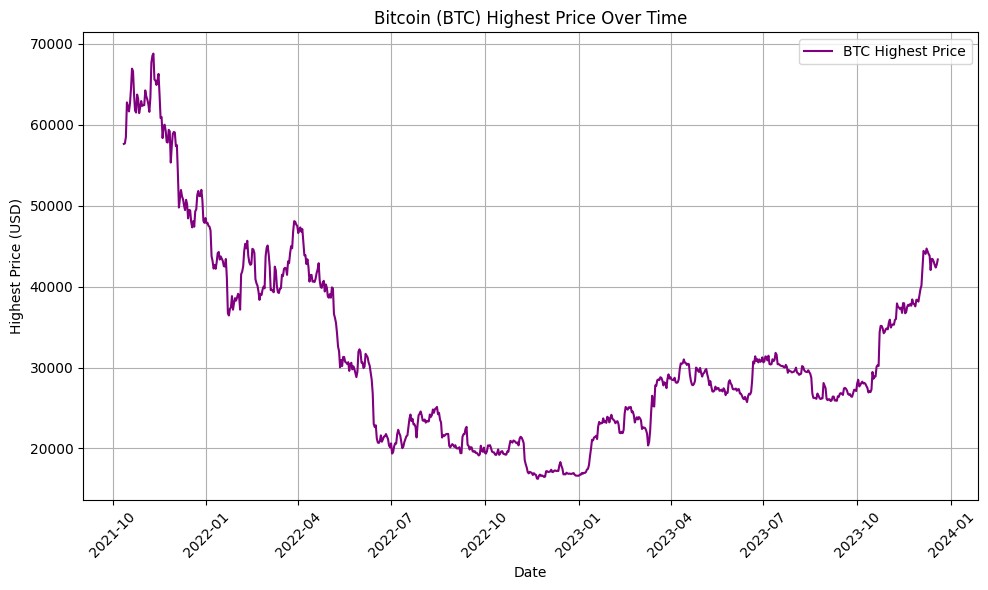

In [13]:
#visualize BTC Highest Price Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], color='purple', linewidth=1.5, label='BTC Highest Price')
plt.title('Bitcoin (BTC) Highest Price Over Time')
plt.xlabel('Date')
plt.ylabel('Highest Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

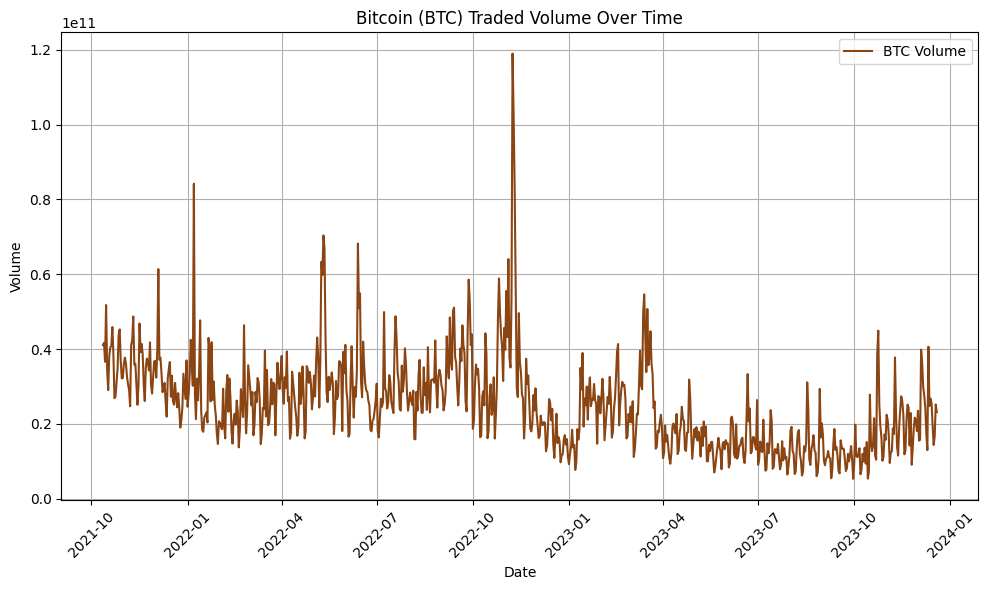

In [14]:
#visualize BTC Volume Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], color='#8B4513', linewidth=1.5, label='BTC Volume')
plt.title('Bitcoin (BTC) Traded Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visualisation of S&P 500 and US Federal Interest Rate dataset

<Figure size 20000x600 with 0 Axes>

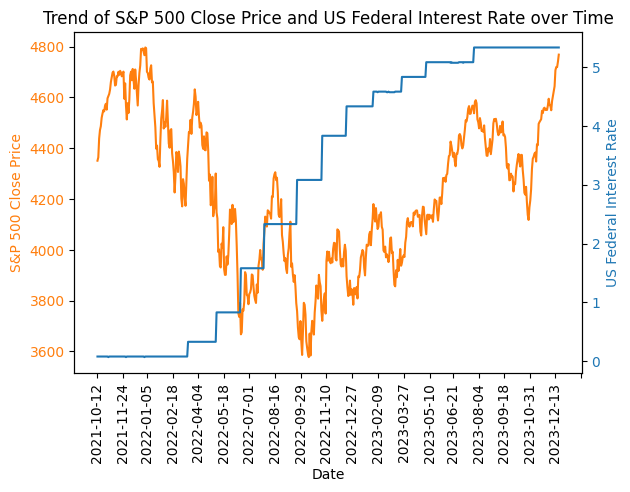

In [8]:
sp500_df = pd.read_csv('SP500.csv')
interest_rate_df = pd.read_csv('Interest Rate.csv')

sp500_df['Date'] = pd.to_datetime(sp500_df['Date'], format='%d/%m/%Y')
sp500_df['Date'] = sp500_df['Date'].dt.strftime('%Y-%m-%d')
interest_rate_df['Date'] = pd.to_datetime(interest_rate_df['Date'], format='%d/%m/%Y')
interest_rate_df['Date'] = interest_rate_df['Date'].dt.strftime('%Y-%m-%d')

merged_df = pd.merge(interest_rate_df[['Date', 'Interest Rate']], sp500_df[['Date', 'Close*']], on='Date')

plt.figure(figsize=(200, 6))
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Close Price', color=color)
ax1.plot(merged_df['Date'], merged_df['Close*'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('US Federal Interest Rate', color=color)  
ax2.plot(merged_df['Date'], merged_df['Interest Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

fig.tight_layout()  
plt.title('Trend of S&P 500 Close Price and US Federal Interest Rate over Time')
plt.show()

#### Visualisation of News dataset

In [37]:
df_news = pd.read_csv('cryptonews.csv')
df_news.columns = ['date','sentiment','source','subject','text','title','url']
df_news.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19 06:03:24,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19 05:35:26,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19 05:31:08,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...


In [38]:
#remove the time from date column
df_news['date'] = df_news['date'].str[:10]
df_news.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...


In [39]:
# Convert the strings in the 'sentiment' column to dictionaries
df_news['sentiment'] = df_news['sentiment'].apply(eval)

# Split the 'sentiment' column into three separate columns
df_news[['sentiment_class', 'sentiment_polarity', 'sentiment_subjectivity']] = pd.DataFrame(df_news['sentiment'].tolist())
df_news.drop(columns=['sentiment'], inplace=True)
df_news.drop(columns=['sentiment_class'], inplace=True)
df_news.head()

,date,source,subject,text,title,url,sentiment_polarity,sentiment_subjectivity
0,2023-12-19,CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,-0.10,0.60
1,2023-12-19,CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,0.00,0.00
2,2023-12-19,CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,0.05,0.05
3,2023-12-19,CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,0.50,0.90
4,2023-12-19,CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,0.00,0.00


In [46]:
df_news['date'] = pd.to_datetime(df_news['date'].str.strip(), format='%Y-%m-%d')

# Extract month from the 'date' column and create a new 'month' column
df_news['month'] = df_news['date'].dt.month

# Extract month from the 'date' column and create a new 'month' column
df_news['year'] = df_news['date'].dt.year

# Convert 'month' and 'year' columns to strings
df_news['month'] = df_news['month'].astype(str)
df_news['year'] = df_news['year'].astype(str)

# Combine 'month' and 'year' columns with a hyphen '-'
df_news['year-month'] = df_news['year'] + '-' + df_news['month']

df_news.head()

,date,source,subject,text,title,url,sentiment_polarity,sentiment_subjectivity,month,year,year-month
0,2023-12-19,CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,-0.10,0.60,12,2023,2023-12
1,2023-12-19,CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,0.00,0.00,12,2023,2023-12
2,2023-12-19,CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,0.05,0.05,12,2023,2023-12
3,2023-12-19,CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,0.50,0.90,12,2023,2023-12
4,2023-12-19,CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,0.00,0.00,12,2023,2023-12


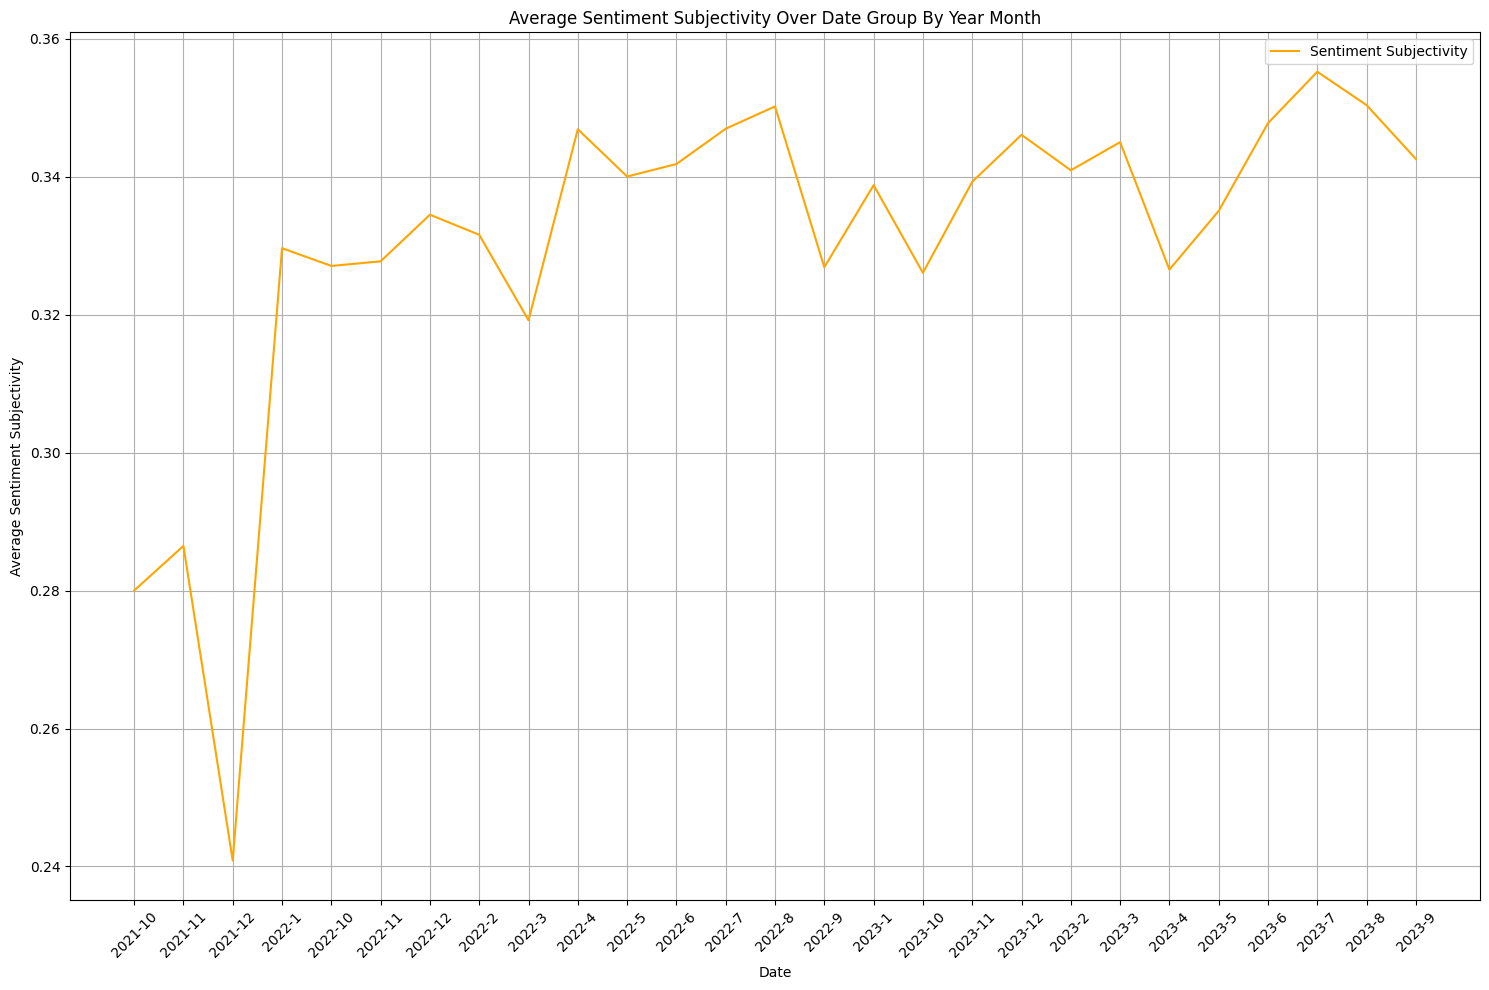

In [47]:
# Group by 'date' and calculate the average sentiment subjectivity for each date
grouped_df = df_news.groupby('year-month')['sentiment_subjectivity'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(grouped_df['year-month'], grouped_df['sentiment_subjectivity'], color='orange', linewidth=1.5, label='Sentiment Subjectivity')
plt.title('Average Sentiment Subjectivity Over Date Group By Year Month')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Subjectivity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
df_news['subject'].unique()

array(['altcoin', 'blockchain', 'ethereum', 'bitcoin', 'nft', 'defi'],
      dtype=object)

/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/1429582527.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/1429582527.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/1429582527.py:15: SettingWithCopyWarning: 
A value is trying to be set 

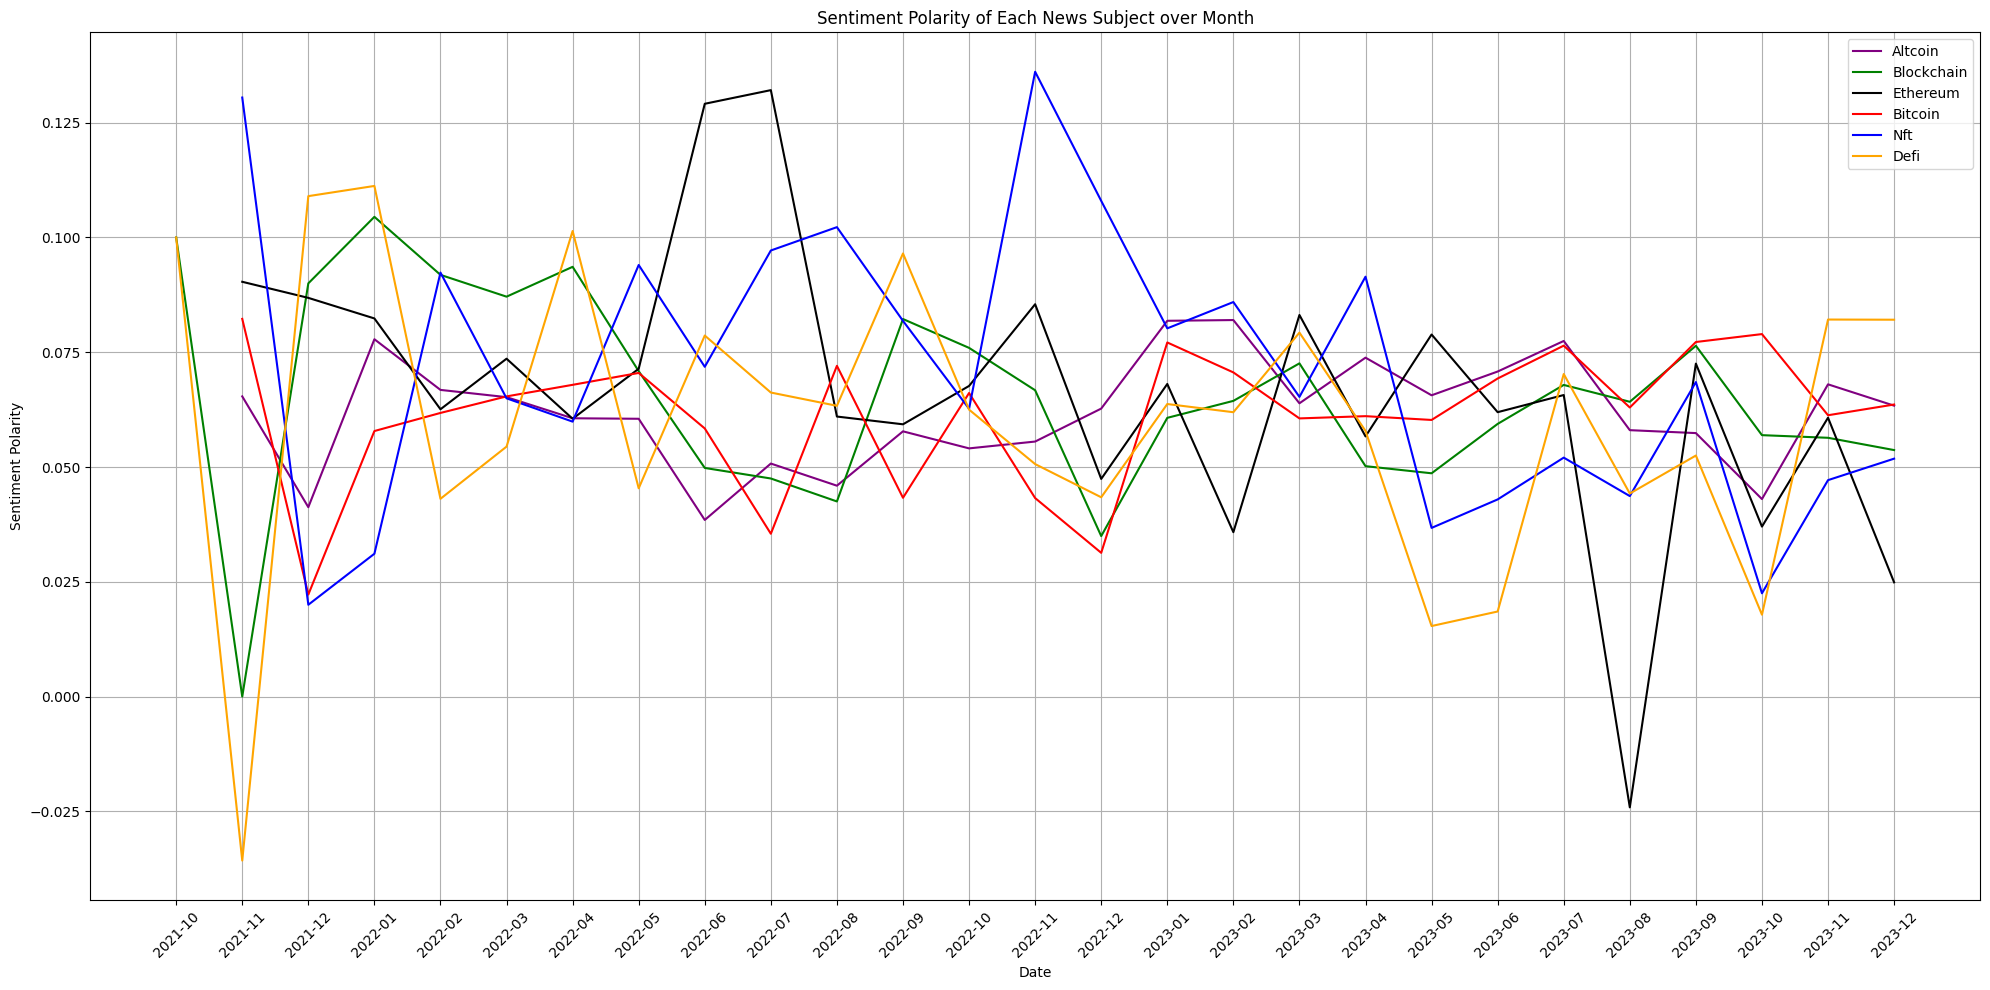

In [26]:
# Sentiment polarity of each news subject over the months
df_news['date'] = df_news['date'].str.strip()
df_news['Date'] = pd.to_datetime(df_news['date'], format='%Y-%m-%d')
df_news_partial = df_news[['Date', 'subject', 'sentiment_polarity']].copy()

df_news_altcoin = df_news_partial[df_news_partial['subject'] == 'altcoin']
df_news_blockchain = df_news_partial[df_news_partial['subject'] == 'blockchain']
df_news_ethereum = df_news_partial[df_news_partial['subject'] == 'ethereum']
df_news_bitcoin = df_news_partial[df_news_partial['subject'] == 'bitcoin']
df_news_nft = df_news_partial[df_news_partial['subject'] == 'nft']
df_news_defi = df_news_partial[df_news_partial['subject'] == 'defi']

dataframes = [df_news_altcoin, df_news_blockchain, df_news_ethereum, df_news_bitcoin, df_news_nft, df_news_defi]

for i, df in enumerate(dataframes):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.groupby(df['Date'].dt.to_period("M")).agg({'sentiment_polarity': 'mean'}).reset_index()

    # Add missing month with NaN values
    missing_month = pd.Period('2021-10', freq='M')
    if missing_month not in df['Date'].values:
        new_row = pd.DataFrame({'Date': [missing_month], 'sentiment_polarity': [np.nan]})
        df = pd.concat([df, new_row]).sort_values(by='Date').reset_index(drop=True)


    # Update the original DataFrame
    dataframes[i] = df

plt.figure(figsize=(20, 10))
for df, color, label in zip(dataframes, ['purple', 'green', 'black', 'red', 'blue', 'orange'], ['Altcoin', 'Blockchain', 'Ethereum', 'Bitcoin', 'Nft', 'Defi']):
    plt.plot(df['Date'].astype(str), df['sentiment_polarity'], color=color, linewidth=1.5, label=label)

plt.title('Sentiment Polarity of Each News Subject over Month')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/214395651.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(monthly_counts.index.astype(str), rotation=90)


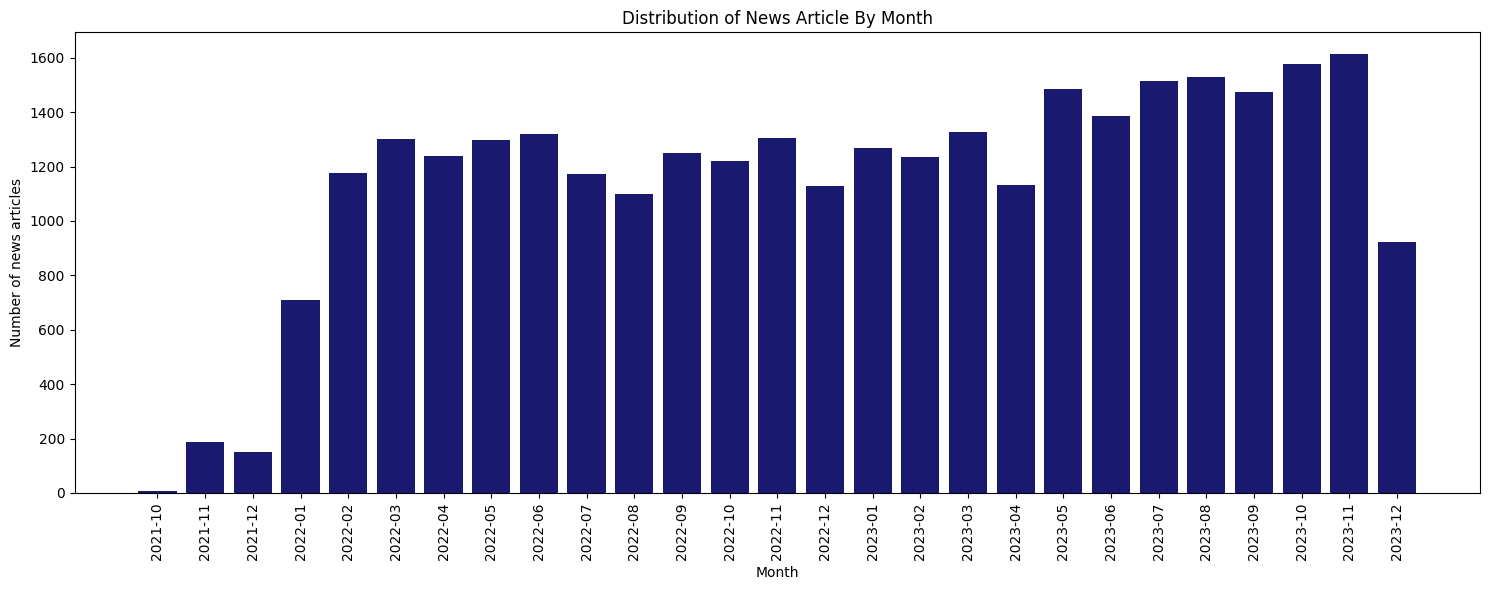

In [27]:
### Distribution of news by day
fig, ax = plt.subplots(figsize=(15, 6))
df_news['Date'] = pd.to_datetime(df_news['date'], format='%Y-%m-%d')

monthly_counts = df_news['Date'].dt.to_period("M").value_counts().sort_index()

ax.bar(monthly_counts.index.astype(str), monthly_counts, color='#191970')

ax.set_xlabel('Month')
ax.set_ylabel('Number of news articles')
ax.set_xticklabels(monthly_counts.index.astype(str), rotation=90)
ax.set_title('Distribution of News Article By Month')

plt.tight_layout()
plt.show()

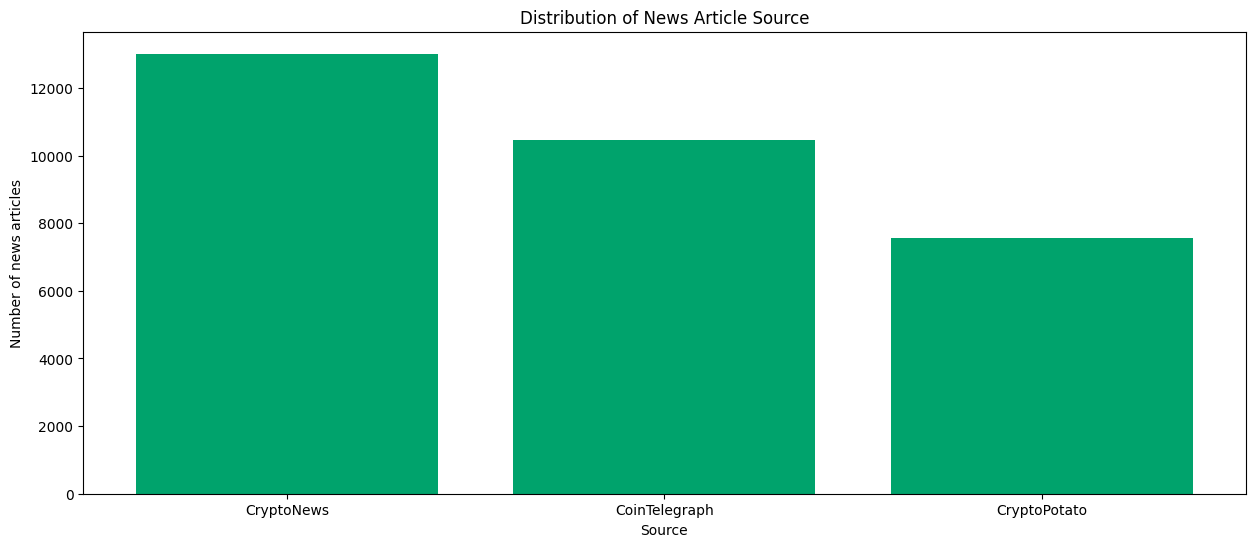

In [28]:
# Distribution of News Sources

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(df_news['source'].unique(), df_news['source'].value_counts(), color='#00A36C')

ax.set_xlabel('Source')
ax.set_ylabel('Number of news articles')
# ax.set_xticklabels(df_news['source'], rotation=90, ha='center')
ax.set_title('Distribution of News Article Source')

plt.show()

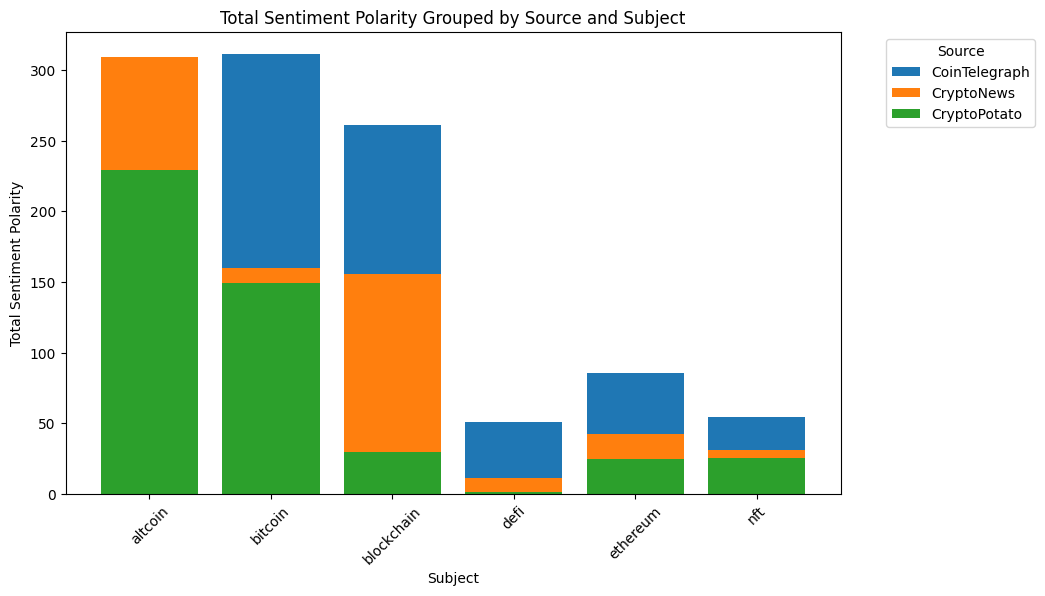

In [29]:
# Group by 'source' and 'subject' and sum the sentiment polarity
grouped_df_news = df_news.groupby(['source', 'subject'])['sentiment_polarity'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
for source in grouped_df_news['source'].unique():
    subset = grouped_df_news[grouped_df_news['source'] == source]
    plt.bar(subset['subject'], subset['sentiment_polarity'], label=source)

plt.xlabel('Subject')
plt.ylabel('Total Sentiment Polarity')
plt.title('Total Sentiment Polarity Grouped by Source and Subject')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

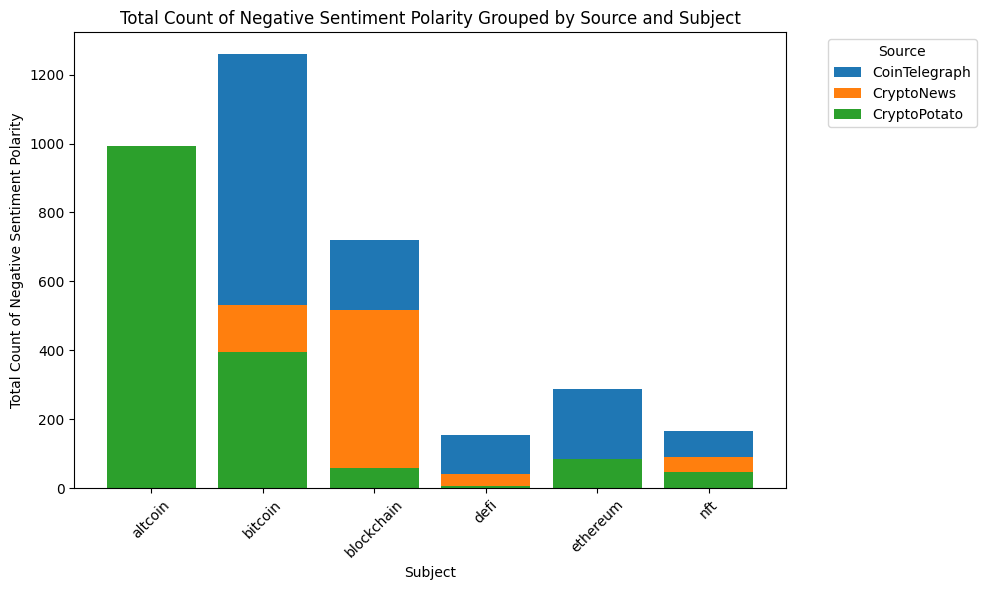

In [30]:
# Filter rows where sentiment polarity is negative
negative_sentiment_df = df_news[df_news['sentiment_polarity'].astype(float) < 0]

# Group by 'source' and 'subject' and count the occurrences of negative sentiment polarity
grouped_df = negative_sentiment_df.groupby(['source', 'subject']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
for source in grouped_df['source'].unique():
    subset = grouped_df[grouped_df['source'] == source]
    plt.bar(subset['subject'], subset['count'], label=source)

plt.xlabel('Subject')
plt.ylabel('Total Count of Negative Sentiment Polarity')
plt.title('Total Count of Negative Sentiment Polarity Grouped by Source and Subject')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

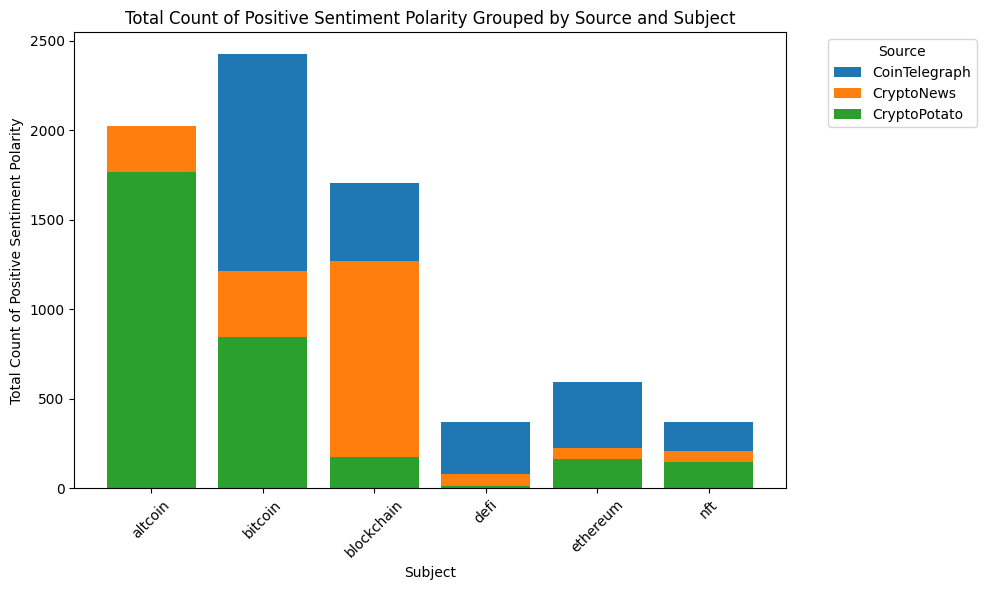

In [31]:
# Filter rows where sentiment polarity is positive
positive_sentiment_df = df_news[df_news['sentiment_polarity'].astype(float) > 0]

# Group by 'source' and 'subject' and count the occurrences of positive sentiment polarity
grouped_df = positive_sentiment_df.groupby(['source', 'subject']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
for source in grouped_df['source'].unique():
    subset = grouped_df[grouped_df['source'] == source]
    plt.bar(subset['subject'], subset['count'], label=source)

plt.xlabel('Subject')
plt.ylabel('Total Count of Positive Sentiment Polarity')
plt.title('Total Count of Positive Sentiment Polarity Grouped by Source and Subject')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

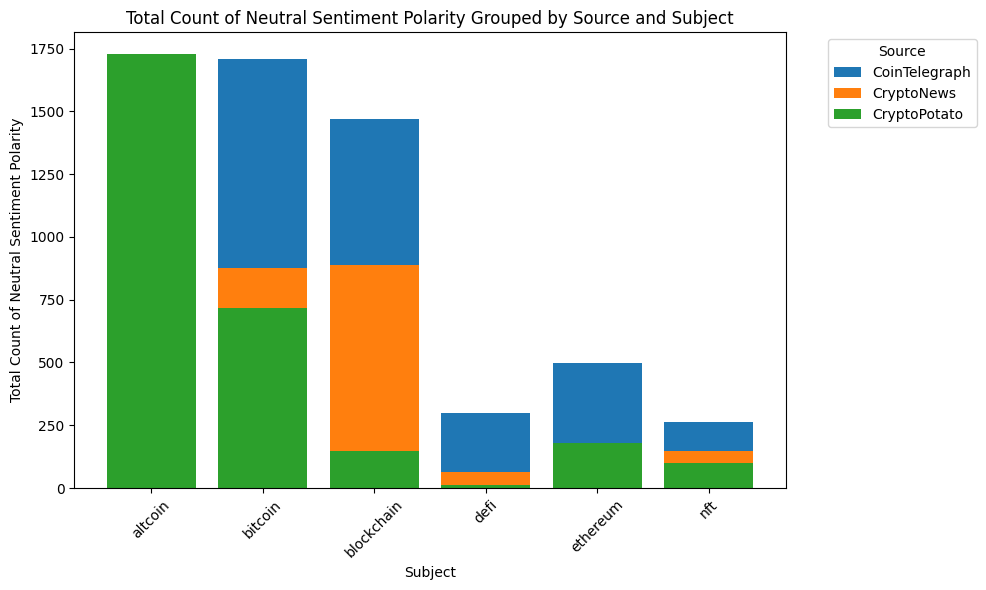

In [32]:
# Filter rows where sentiment polarity is neutral
negative_sentiment_df = df_news[df_news['sentiment_polarity'] == 0]

# Group by 'source' and 'subject' and count the occurrences of neutral sentiment polarity
grouped_df = negative_sentiment_df.groupby(['source', 'subject']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
for source in grouped_df['source'].unique():
    subset = grouped_df[grouped_df['source'] == source]
    plt.bar(subset['subject'], subset['count'], label=source)

plt.xlabel('Subject')
plt.ylabel('Total Count of Neutral Sentiment Polarity')
plt.title('Total Count of Neutral Sentiment Polarity Grouped by Source and Subject')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,source,subject,count
0,CoinTelegraph,altcoin,719
1,CoinTelegraph,bitcoin,5393
2,CoinTelegraph,blockchain,3896
3,CoinTelegraph,defi,822
4,CoinTelegraph,ethereum,1380
5,CoinTelegraph,nft,800
6,CryptoNews,altcoin,4075
7,CryptoNews,bitcoin,2618
8,CryptoNews,blockchain,2672
9,CryptoNews,defi,185


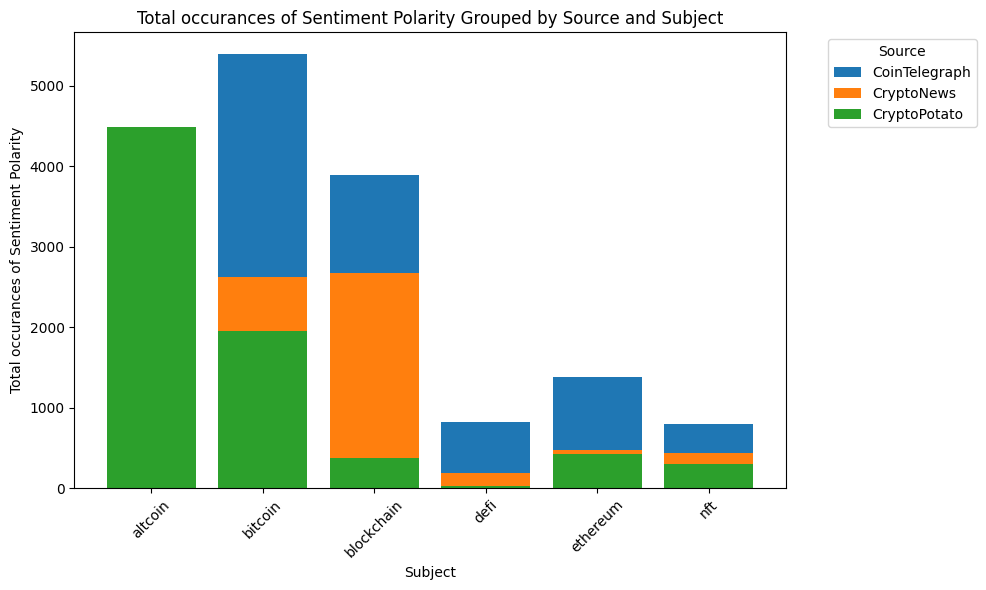

In [35]:
new_sentiment_df = df_news[['source','subject','sentiment_polarity'] ]

# Group by 'source' and 'subject' and count the occurrences of sentiment polarity
grouped_count_df = new_sentiment_df.groupby(['source', 'subject']).size().reset_index(name='count')
display(grouped_count_df)
# Plotting
plt.figure(figsize=(10, 6))
for source in grouped_count_df['source'].unique():
    subset = grouped_count_df[grouped_count_df['source'] == source]
    plt.bar(subset['subject'], subset['count'], label=source)

plt.xlabel('Subject')
plt.ylabel('Total occurances of Sentiment Polarity')
plt.title('Total occurances of Sentiment Polarity Grouped by Source and Subject')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Visualisation of Tweet dataset

In [48]:
df_tweetsentiment = pd.read_csv('dataset_52-person-from-2021-02-05_2023-06-12_21-34-17-266_with_sentiment.csv')
df_tweetsentiment.head()

,Unnamed: 0,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type
0,32666,2/1/2021,154,#privacy is a human right. learn how to make y...,18,23,privacy human right learn make bitcoin transac...,340.0,0.000588,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,29639,2/1/2021,17,"overall btc trading volume has increased, but ...",1,5,overall btc trading volume increased average t...,39.5,0.000068,(btc),"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.2124,POSITIVE
2,29613,2/1/2021,3,"on average, the return distribution of btc ske...",0,1,average return distribution btc skews slightly...,7.0,0.000012,(btc),"{'neg': 0.053, 'neu': 0.769, 'pos': 0.177, 'co...",0.7010,POSITIVE
3,39638,2/1/2021,3496,i sent some! https://t.co/mfyrz35zjf\n\nyou sh...,731,686,sent httpstcomfyrz35zjf givedirectly great wor...,8043.5,0.013905,(doge),"{'neg': 0.06, 'neu': 0.856, 'pos': 0.084, 'com...",0.2225,POSITIVE
4,32660,2/1/2021,0,rt @reg_mati: la privacidad es un derecho huma...,0,7,rt reg_mati la privacidad e un derecho humano ...,7.0,0.000012,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


In [49]:
df_tweetsentiment['Date'] = pd.to_datetime(df_tweetsentiment['created_at'], format='%m/%d/%Y')

# Change date format to '%Y-%m-%d' to match the other datasets
df_tweetsentiment['Date'] = df_tweetsentiment['Date'].dt.strftime('%Y-%m-%d')
df_tweetsentiment['tweet_count'] = 1
df_tweetsentiment.head()

,Unnamed: 0,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type,Date,tweet_count
0,32666,2/1/2021,154,#privacy is a human right. learn how to make y...,18,23,privacy human right learn make bitcoin transac...,340.0,0.000588,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,2021-02-01,1
1,29639,2/1/2021,17,"overall btc trading volume has increased, but ...",1,5,overall btc trading volume increased average t...,39.5,0.000068,(btc),"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.2124,POSITIVE,2021-02-01,1
2,29613,2/1/2021,3,"on average, the return distribution of btc ske...",0,1,average return distribution btc skews slightly...,7.0,0.000012,(btc),"{'neg': 0.053, 'neu': 0.769, 'pos': 0.177, 'co...",0.7010,POSITIVE,2021-02-01,1
3,39638,2/1/2021,3496,i sent some! https://t.co/mfyrz35zjf\n\nyou sh...,731,686,sent httpstcomfyrz35zjf givedirectly great wor...,8043.5,0.013905,(doge),"{'neg': 0.06, 'neu': 0.856, 'pos': 0.084, 'com...",0.2225,POSITIVE,2021-02-01,1
4,32660,2/1/2021,0,rt @reg_mati: la privacidad es un derecho huma...,0,7,rt reg_mati la privacidad e un derecho humano ...,7.0,0.000012,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,2021-02-01,1


##### Visualising for all cryptocurrencies' data in the dataset

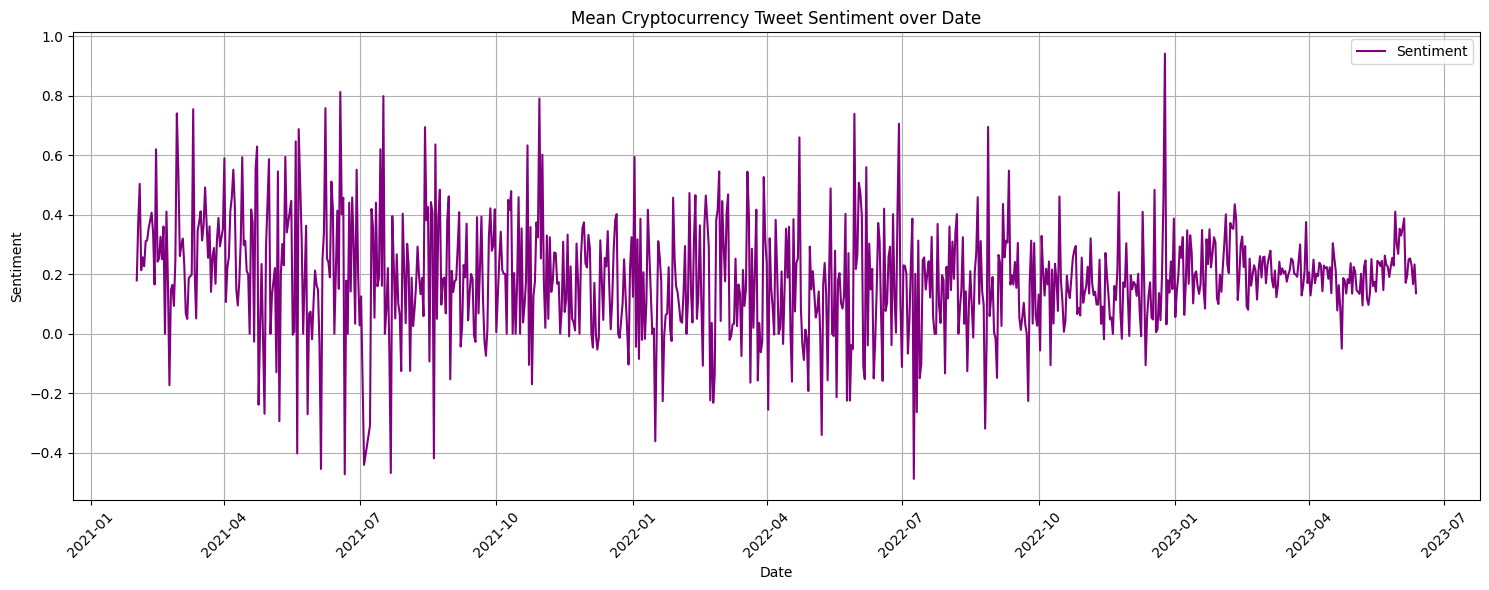

In [50]:
df_tweetsentiment['Date'] = pd.to_datetime(df_tweetsentiment['Date'], format='%Y-%m-%d')
df_tweetsentimentByDate = df_tweetsentiment[['Date', 'compound', 'tweet_count']].groupby('Date').agg({'compound': 'mean', 'tweet_count': 'sum'}).reset_index()
conditions = [
    df_tweetsentimentByDate['compound'] < 0,
    df_tweetsentimentByDate['compound'] == 0,
    df_tweetsentimentByDate['compound'] > 0
]
sentiment = ['Negative', 'Neutral', 'Positive']

df_tweetsentimentByDate['sentimentAveDate'] = np.select(conditions, sentiment, default='Unknown')
df_tweetsentimentByDate.head()


plt.figure(figsize=(15, 6))
plt.plot(df_tweetsentimentByDate['Date'], df_tweetsentimentByDate['compound'], color='purple', linewidth=1.5, label='Sentiment')
plt.title('Mean Cryptocurrency Tweet Sentiment over Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
df_tweetsentiment['Date'] = pd.to_datetime(df_tweetsentiment['Date'], format='%Y-%m-%d')
df_tweetsentimentByMonth = df_tweetsentiment[['Date', 'compound', 'tweet_count']].groupby(df_tweetsentiment['Date'].dt.to_period("M")).agg({'compound': 'mean', 'tweet_count': 'sum'}).reset_index()

conditions = [
    df_tweetsentimentByMonth['compound'] < 0,
    df_tweetsentimentByMonth['compound'] == 0,
    df_tweetsentimentByMonth['compound'] > 0
]
sentiment = ['Negative', 'Neutral', 'Positive']

df_tweetsentimentByMonth['sentimentAveMonth'] = np.select(conditions, sentiment, default='Unknown')
df_tweetsentimentByMonth.head()

,Date,compound,tweet_count,sentimentAveMonth
0,2021-02,0.289798,176,Positive
1,2021-03,0.294624,118,Positive
2,2021-04,0.299258,112,Positive
3,2021-05,0.165457,75,Positive
4,2021-06,0.201005,96,Positive


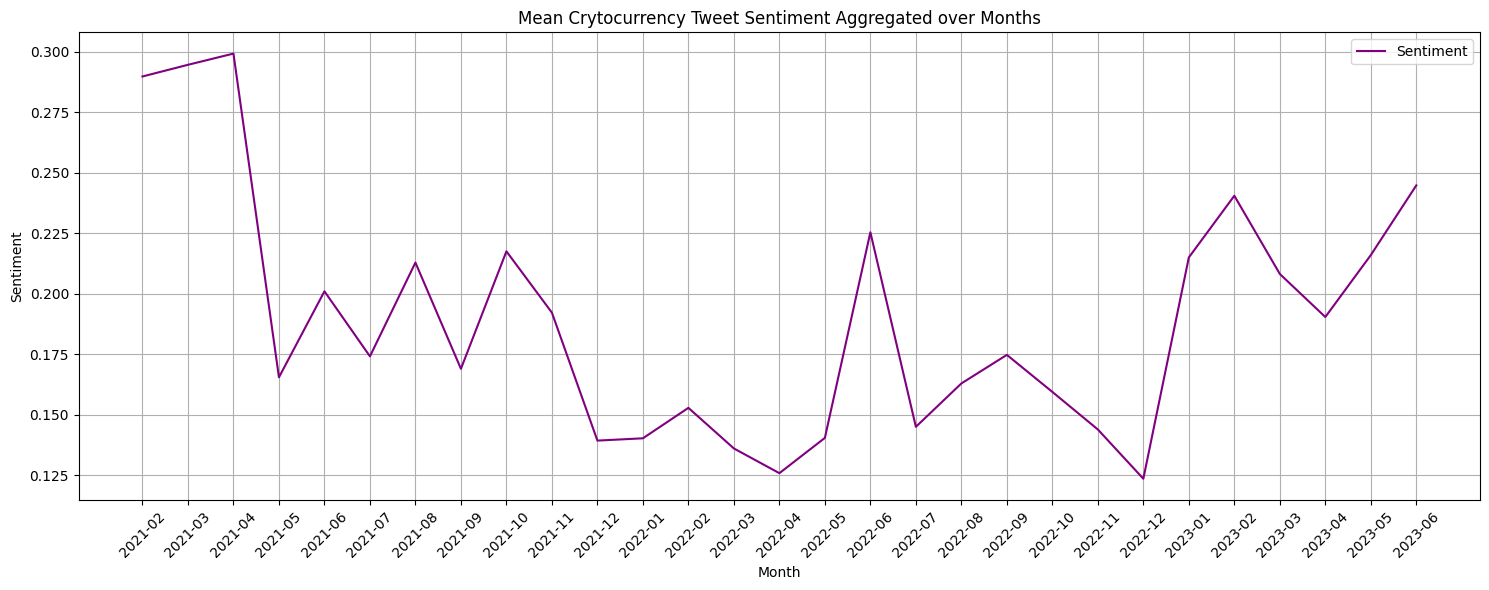

In [52]:
plt.figure(figsize=(15, 6))
plt.plot(df_tweetsentimentByMonth['Date'].astype(str), df_tweetsentimentByMonth['compound'], color='purple', linewidth=1.5, label='Sentiment')
plt.title('Mean Crytocurrency Tweet Sentiment Aggregated over Months')
plt.xlabel('Month')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/1418176664.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_tweetsentimentByMonth['Date'], rotation=45, ha='center')


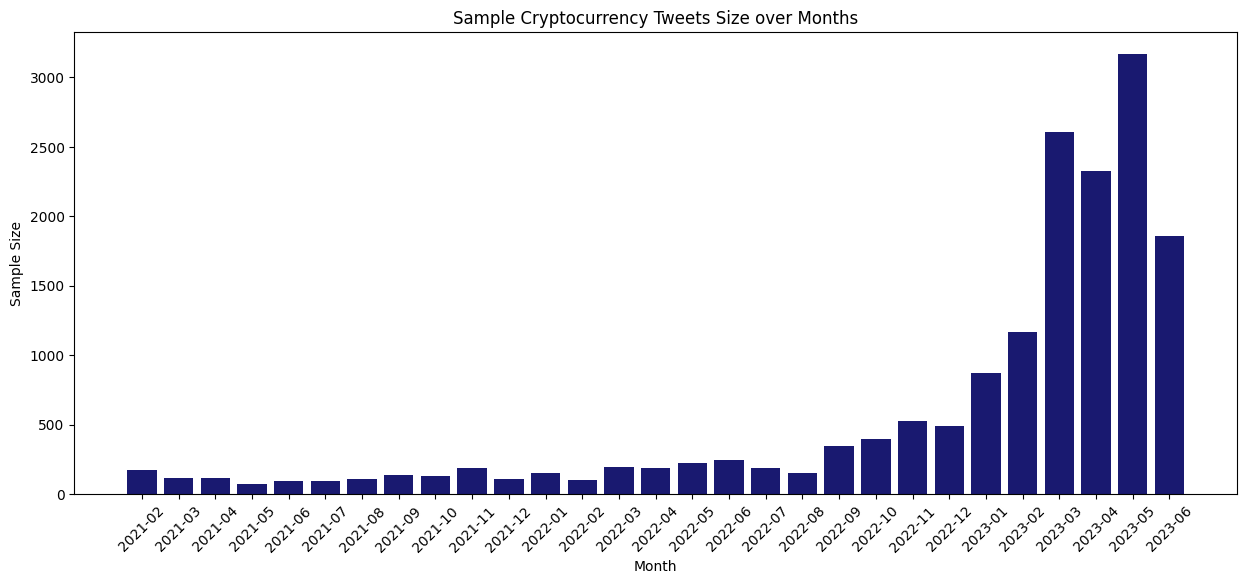

In [53]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(df_tweetsentimentByMonth['Date'].astype(str), df_tweetsentimentByMonth['tweet_count'], color='#191970')

ax.set_xlabel('Month')
ax.set_ylabel('Sample Size')
ax.set_xticklabels(df_tweetsentimentByMonth['Date'], rotation=45, ha='center')
ax.set_title('Sample Cryptocurrency Tweets Size over Months')

plt.show()

/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/1925637998.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_tweetsentiment['sentiment_type'].unique())


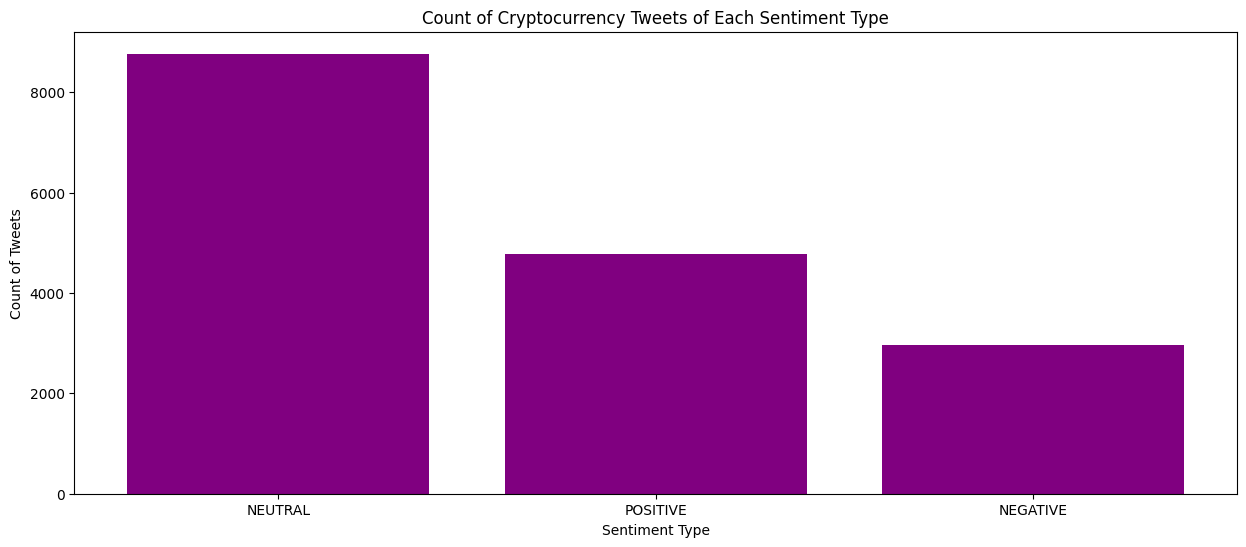

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(df_tweetsentiment['sentiment_type'].unique(), df_tweetsentiment['sentiment_type'].value_counts(), color='purple')

ax.set_xlabel('Sentiment Type')
ax.set_ylabel('Count of Tweets')
ax.set_xticklabels(df_tweetsentiment['sentiment_type'].unique())
ax.set_title('Count of Cryptocurrency Tweets of Each Sentiment Type')

plt.show()

##### Visualising only bitcoin data from the dataset

In [60]:
# filter data which contain bitcoin references
filterByBtc_df = df_tweetsentiment[df_tweetsentiment['new_coins'].str.contains('bitcoin|btc', case=False)]
#display(filterByBtc_df)

/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/1646038742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterByBtc_df['Date'] = pd.to_datetime(filterByBtc_df['Date'], format='%Y-%m-%d')


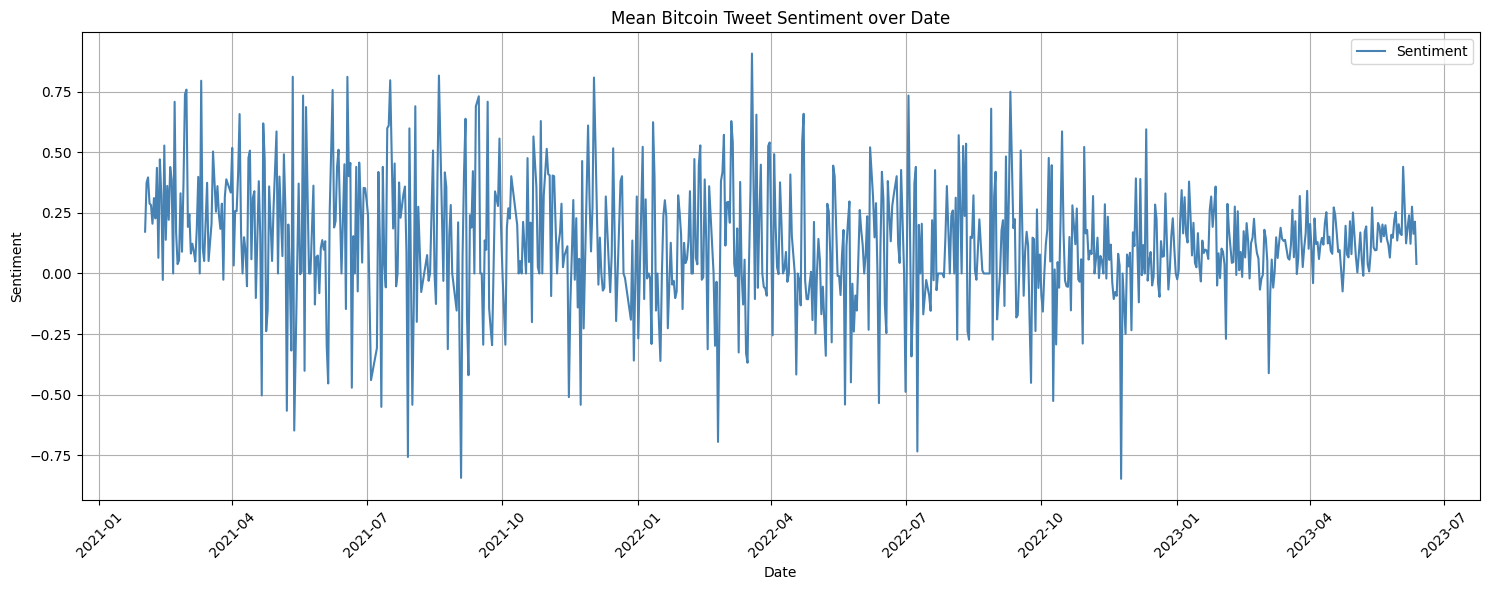

In [56]:
filterByBtc_df['Date'] = pd.to_datetime(filterByBtc_df['Date'], format='%Y-%m-%d')
filterByBtc_dfByDate = filterByBtc_df[['Date', 'compound', 'tweet_count']].groupby('Date').agg({'compound': 'mean', 'tweet_count': 'sum'}).reset_index()
conditions = [
    filterByBtc_dfByDate['compound'] < 0,
    filterByBtc_dfByDate['compound'] == 0,
    filterByBtc_dfByDate['compound'] > 0
]
sentiment = ['Negative', 'Neutral', 'Positive']

filterByBtc_dfByDate['sentimentAveDate'] = np.select(conditions, sentiment, default='Unknown')
filterByBtc_dfByDate.head()

plt.figure(figsize=(15, 6))
plt.plot(filterByBtc_dfByDate['Date'], filterByBtc_dfByDate['compound'], color='#4682B4', linewidth=1.5, label='Sentiment')
plt.title('Mean Bitcoin Tweet Sentiment over Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/4108101948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterByBtc_df['Date'] = pd.to_datetime(filterByBtc_df['Date'], format='%Y-%m-%d')


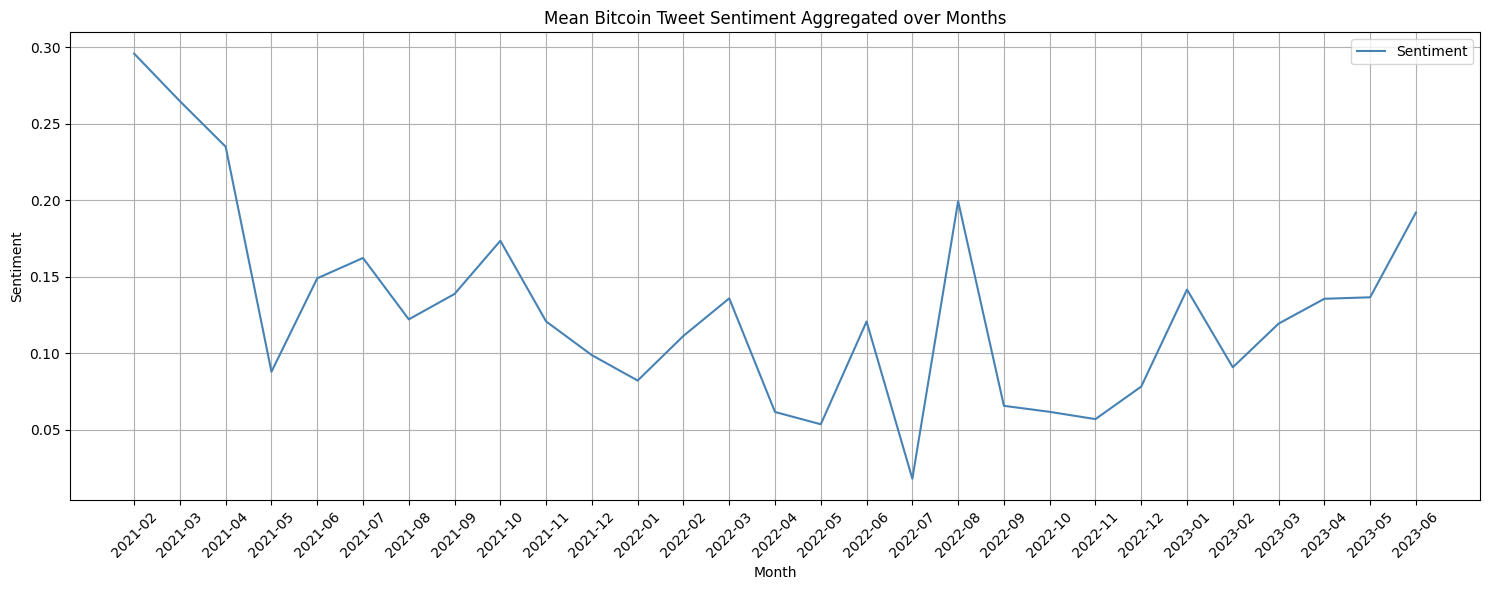

In [57]:
filterByBtc_df['Date'] = pd.to_datetime(filterByBtc_df['Date'], format='%Y-%m-%d')
filterByBtc_dfByMonth = filterByBtc_df[['Date', 'compound', 'tweet_count']].groupby(filterByBtc_df['Date'].dt.to_period("M")).agg({'compound': 'mean', 'tweet_count': 'sum'}).reset_index()

plt.figure(figsize=(15, 6))
plt.plot(filterByBtc_dfByMonth['Date'].astype(str), filterByBtc_dfByMonth['compound'], color='#4682B4', linewidth=1.5, label='Sentiment')
plt.title('Mean Bitcoin Tweet Sentiment Aggregated over Months')
plt.xlabel('Month')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/4113370798.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filterByBtc_dfByMonth['Date'], rotation=45, ha='center')


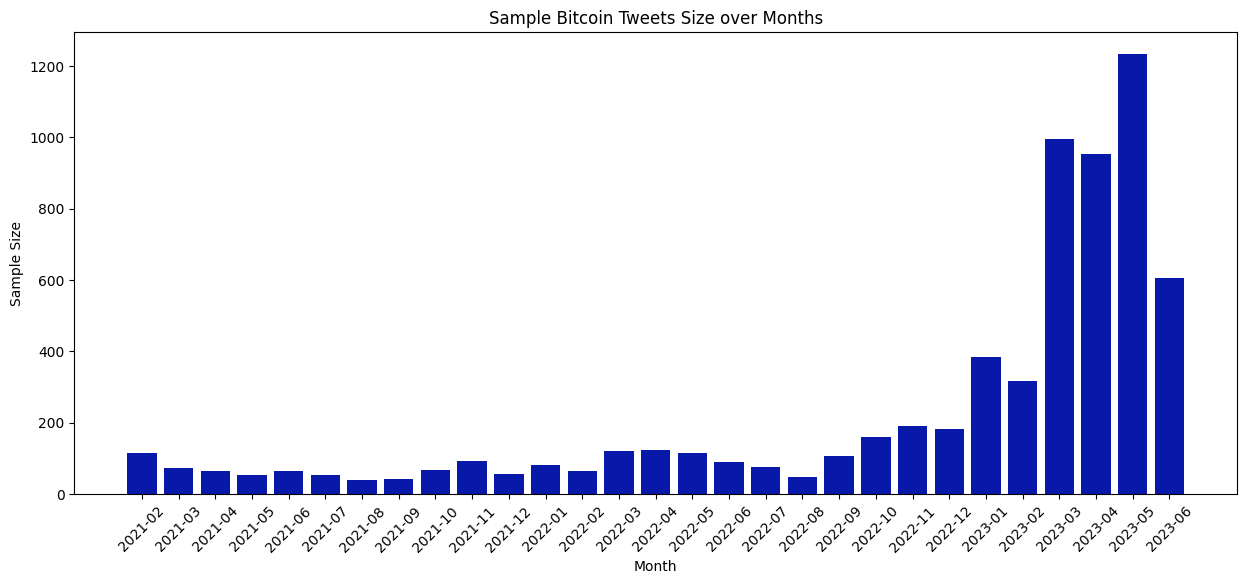

In [58]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(filterByBtc_dfByMonth['Date'].astype(str), filterByBtc_dfByMonth['tweet_count'], color='#0818A8')

ax.set_xlabel('Month')
ax.set_ylabel('Sample Size')
ax.set_xticklabels(filterByBtc_dfByMonth['Date'], rotation=45, ha='center')
ax.set_title('Sample Bitcoin Tweets Size over Months')

plt.show()

/var/folders/nr/swgbhxf130v_ky4v3pkb9ljw0000gn/T/ipykernel_12080/1142334616.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filterByBtc_df['sentiment_type'].unique())


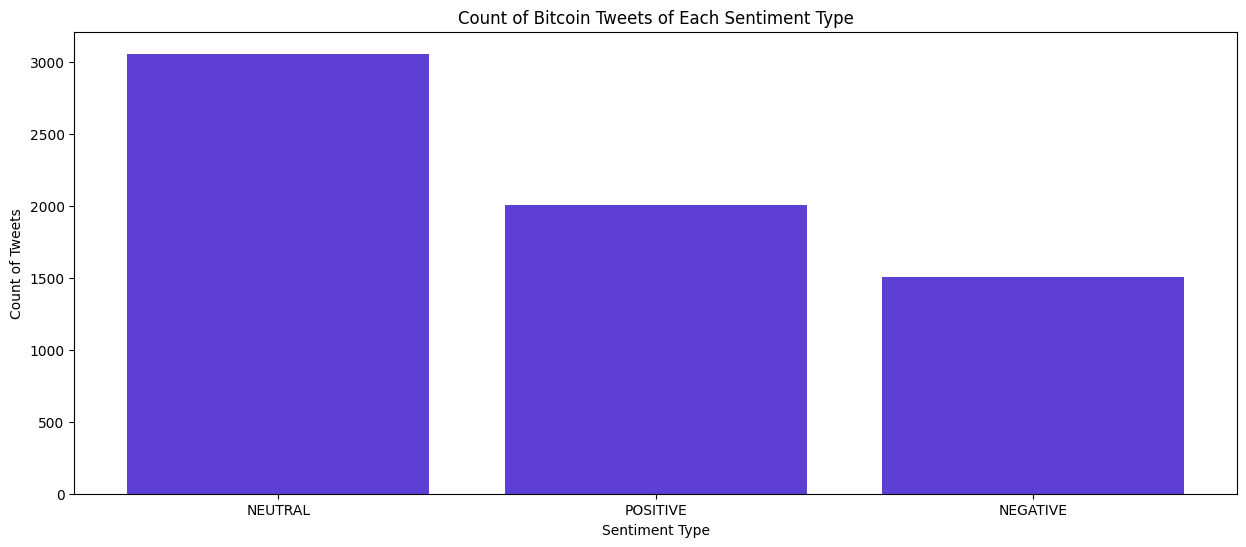

In [59]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(filterByBtc_df['sentiment_type'].unique(), filterByBtc_df['sentiment_type'].value_counts(), color='#5D3FD3')

ax.set_xlabel('Sentiment Type')
ax.set_ylabel('Count of Tweets')
ax.set_xticklabels(filterByBtc_df['sentiment_type'].unique())
ax.set_title('Count of Bitcoin Tweets of Each Sentiment Type')

plt.show()